In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


# 使用seaborn输出默认情况
import seaborn as sns;sns.set()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
# 聚类数据生成器，cluster_std 表示 生成样本的标准差
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                 random_state=0, cluster_std=0.60)

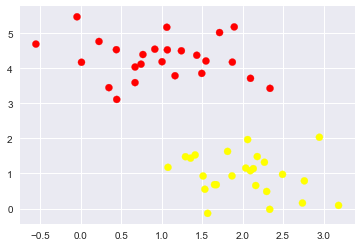

In [5]:
plt.scatter(X[:,0], X[:,1],c=y, s=50,cmap="autumn" )

(-1, 3.5)

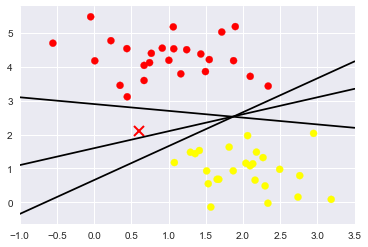

In [8]:
# np.linspace 默认的间隔为50
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:,1], c=y,s=50, cmap="autumn")
plt.plot([0.6],[2.1],"x",color="red", markeredgewidth=2,markersize=10)

for m,b in [(1,0.66),(0.5,1.6),(-0.2,2.9)]:
    plt.plot(xfit, m*xfit+b,"-k")
    
plt.xlim(-1,3.5)

(-1, 3.5)

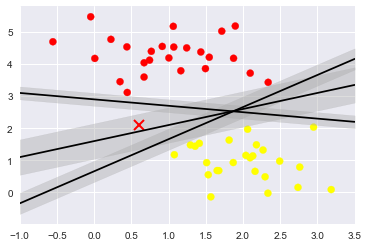

In [9]:
# np.linspace 默认的间隔为50
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50, cmap="autumn")
plt.plot([0.6], [2.1],"x",color="red", markeredgewidth=2,markersize=10)

for m,b,d in [(1,0.66,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
    yfit = m*xfit+b
    plt.plot(xfit, yfit,"-k")
    plt.fill_between(xfit, yfit -d, yfit +d, edgecolor="none", color="#AAAAAA",alpha=0.4)    
plt.xlim(-1,3.5)

In [10]:
# 训练一个基本的SVM
from sklearn.svm import SVC   # 支持向量分类器
model = SVC(kernel="linear")
model.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

这里的C设置的是默认值1.0 kernel核函数为“线性核函数”

In [14]:
# 绘图函数
def plot_svc_decision_function(model, ax=None, plot_support=True):
    '''
    绘制一个 2维的支持向量机决策函数
    '''
    if ax is None:
        # 获得当前的绘制轴线
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # 创建 grid 评估函数
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    
    #网格化
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # 输出决策边界和带宽
    ax.contour(X, Y, P, colors="k",
              levels=[-1,0,1],alpha = 0.5,
              linestyles=["--","-","--"])
    
    # 输出支持向量
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                   model.support_vectors_[:,1],
                   s=300,linewidth=1,facecolors="none")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

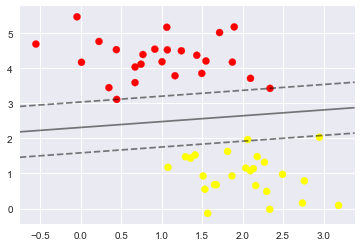

In [15]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="autumn")
plot_svc_decision_function(model)

In [16]:
model.support_vectors_

array([[ 0.44359863,  3.11530945],
       [ 2.33812285,  3.43116792],
       [ 2.06156753,  1.96918596]])

### 在sklearn中，它们存储在这个support_vectors_这里面

# 引入核函数的支持向量机

In [17]:
from sklearn.datasets.samples_generator import make_circles

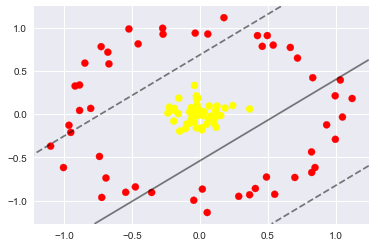

In [18]:
# 生成数据点
X, y =make_circles(100, factor=.1, noise=.1)
clf = SVC(kernel="linear").fit(X, y)

plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="autumn")
plot_svc_decision_function(clf, plot_support=False)

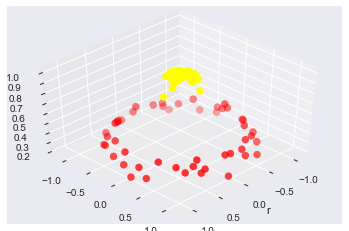

In [20]:
# 加入了新的维度
from mpl_toolkits import mplot3d
r=np.exp(-(X**2).sum(1))
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap="autumn")
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel("x")
    ax.set_xlabel("y")
    ax.set_xlabel("r")
    
plot_3D(elev=45, azim=45, X=X, y=y)

In [21]:
# 加入径向基函数=rbf核函数=高斯核函数
clf=SVC(kernel="rbf",C=1E6)
clf.fit(X,y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

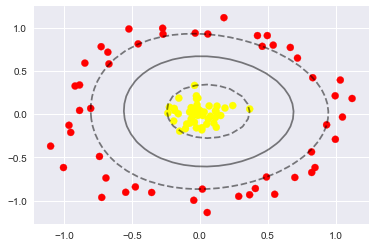

In [22]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="autumn")
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=300,lw=1,facecolors="none")

## 支持向量机
C:误差允许度 【线性划分】 gamma：对应模型的复杂程度 【高斯核函数】：rbf，越复杂的模型泛化能力越弱

# Soft Margin问题
## 参数C的调节
* 当参数C较大的时候，意味着不允许有分错的点
* 当参数C较小的时候，意味着允许有比较多分错的点

In [23]:
# 生成参数
X,y = make_blobs(n_samples = 100, centers=2, random_state=0, cluster_std=0.8)

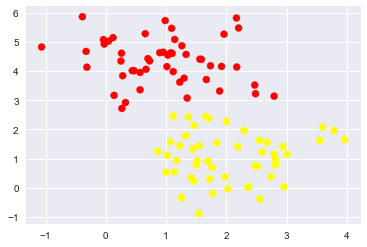

In [24]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap="autumn")

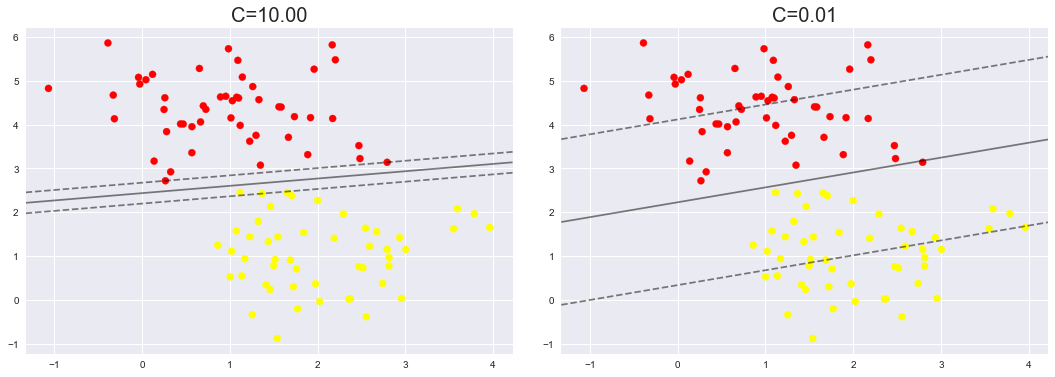

In [30]:
X,y = make_blobs(n_samples = 100, centers=2, random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.0625, right=0.95,wspace=0.1)

for axi, C in zip(ax, [10.0, 0.01]):
    model = SVC(kernel="linear", C=C).fit(X, y)
    axi.scatter(X[:,0], X[:,1], c=y, s=50, cmap="autumn")  #s表示点的大小
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:,0],
               model.support_vectors_[:,1],
               s=300,lw=5, facecolors="none" );
    axi.set_title("C={0:.2f}".format(C), size=20)

## gamma值的影响

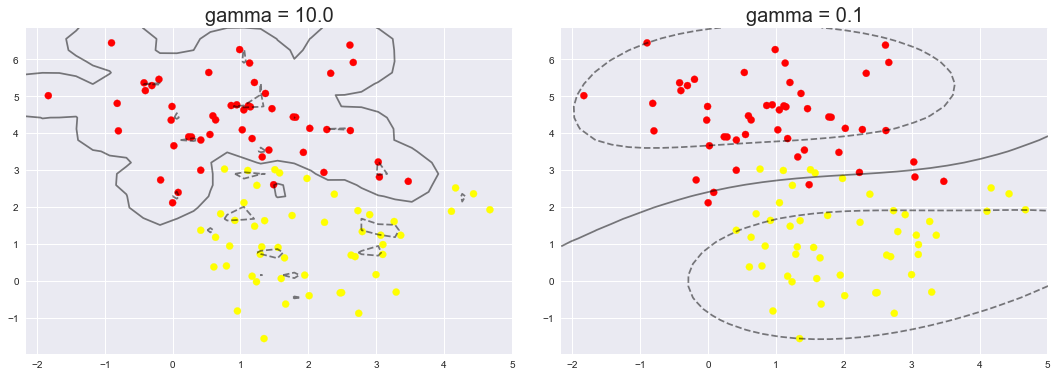

In [33]:
X,y = make_blobs(n_samples = 100, centers=2, random_state=0, cluster_std=1.1)

fig, ax = plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.0625, right=0.95,wspace=0.1)

for axi, gamma in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='rbf',gamma=gamma).fit(X, y)
    axi.scatter(X[:,0], X[:,1], c=y, s=50, cmap="autumn")
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:,0],
                model.support_vectors_[:,1],
                s=300,lw=5, facecolors="none" );
    axi.set_title("gamma = {0:.1f}".format(gamma), size=20)

### 对于一个比较大的gamma值，生成的模型比较复杂，模型泛化能力越低
### 对于一个比较小的gamma值，生成的模型比较简单，模型泛化能力更强